In [30]:
# Import library
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [31]:
data = pd.read_csv("/content/application_train.csv")

In [32]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
155332,280065,0,Cash loans,F,Y,N,0,157500.0,900000.0,38133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155333,280066,1,Cash loans,M,N,Y,0,270000.0,748651.5,59278.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
155334,280067,0,Cash loans,F,Y,Y,1,90000.0,294322.5,15367.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
155335,280068,0,Cash loans,F,Y,Y,0,202500.0,787131.0,26145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155336,280069,0,Cash loans,F,N,Y,0,112500.0,9450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155337 entries, 0 to 155336
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 144.6+ MB


In [36]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,155337.000000,155337.000000,155337.000000,1.553370e+05,1.553370e+05,155328.000000,1.552060e+05,155336.000000,155336.000000,155336.000000,...,155336.000000,155336.000000,155336.000000,155336.000000,134521.000000,134521.000000,134521.000000,134521.000000,134521.000000,134521.000000
mean,190086.170558,0.081597,0.418329,1.689358e+05,5.989947e+05,27107.604923,5.383138e+05,0.020875,-16022.347344,63495.841486,...,0.008079,0.000592,0.000509,0.000315,0.006482,0.006988,0.033883,0.267854,0.263751,1.888070
std,51991.495072,0.273750,0.721634,3.138067e+05,4.028766e+05,14580.369220,3.699234e+05,0.013828,4367.920796,141004.273195,...,0.089521,0.024329,0.022546,0.017758,0.085716,0.111201,0.203039,0.922932,0.609886,1.865655
min,100002.000000,0.000000,0.000000,2.565000e+04,9.450000e+03,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144976.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,-19669.000000,-2753.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,190049.000000,0.000000,0.000000,1.440000e+05,5.130000e+05,24889.500000,4.500000e+05,0.018850,-15726.000000,-1215.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,235103.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12386.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,280069.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [37]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].astype('float')

In [38]:
data['DAYS_BIRTH'].fillna(0, inplace=True)

In [39]:
data = data.dropna()

In [40]:
data['AGE'] = (data['DAYS_BIRTH'] / 365).round()

<ipython-input-40-7ea9feb2f01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE'] = (data['DAYS_BIRTH'] / 365).round()


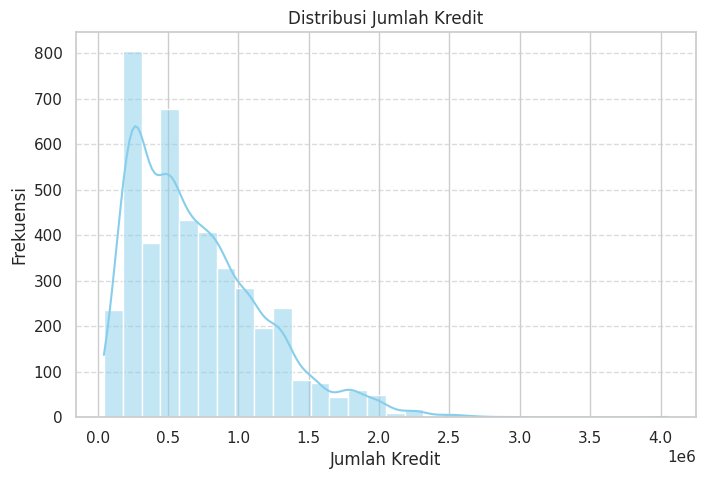

In [41]:
sns.set(style="whitegrid")

# Plot histogram dengan seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data['AMT_CREDIT'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Kredit')
plt.xlabel('Jumlah Kredit')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

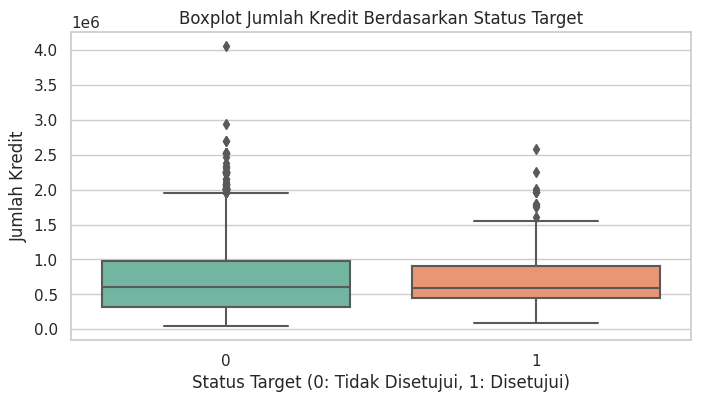

In [42]:
# Create boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data, palette='Set2')
plt.title('Boxplot Jumlah Kredit Berdasarkan Status Target')
plt.xlabel('Status Target (0: Tidak Disetujui, 1: Disetujui)')
plt.ylabel('Jumlah Kredit')
plt.show()

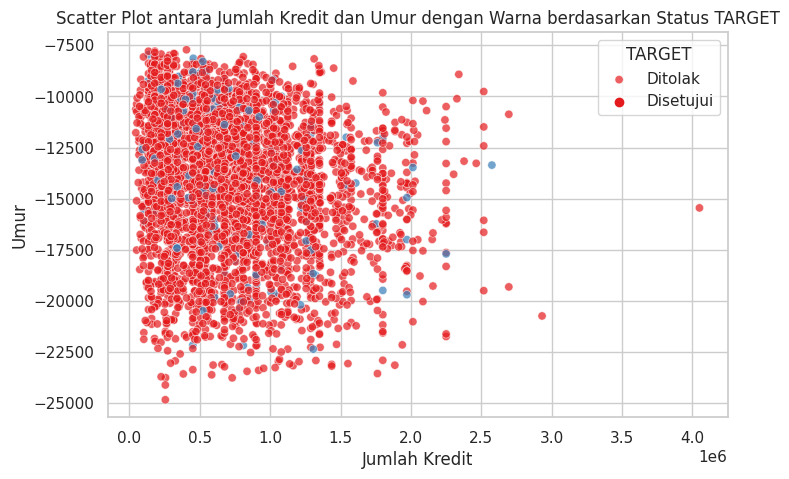

In [43]:
# Plot scatter plot dengan warna berdasarkan status TARGET
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AMT_CREDIT', y='DAYS_BIRTH', hue='TARGET', data=data, palette='Set1', alpha=0.7)
plt.xlabel('Jumlah Kredit')
plt.ylabel('Umur')
plt.title('Scatter Plot antara Jumlah Kredit dan Umur dengan Warna berdasarkan Status TARGET')
plt.legend(title='TARGET', labels=['Ditolak', 'Disetujui'])
plt.show()

In [44]:
# Hitung statistik deskriptif
print(data['AMT_CREDIT'].describe())

count    4.348000e+03
mean     7.053276e+05
std      4.619686e+05
min      4.500000e+04
25%      3.150000e+05
50%      5.994720e+05
75%      9.712800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [18]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(data[data['TARGET'] == 1]['AGE'], data[data['TARGET'] == 0]['AGE'])
if p_value < 0.05:
    print('H0 ditolak')
else:
    print('H0 diterima')


H0 ditolak


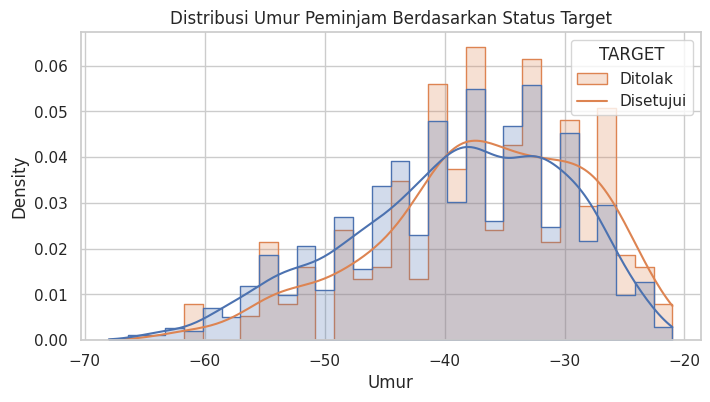

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data, x='AGE', hue='TARGET', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribusi Umur Peminjam Berdasarkan Status Target')
plt.xlabel('Umur')
plt.ylabel('Density')
plt.legend(title='TARGET', labels=['Ditolak', 'Disetujui'])
plt.show()

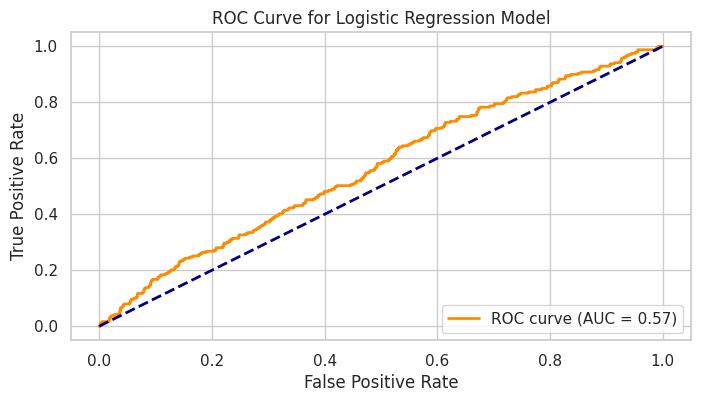

In [23]:
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Select features
features = ['AMT_CREDIT', 'DAYS_BIRTH']

# Split data
X_train, X_test, y_train, y_test = train_test_split(data[features], data['TARGET'], test_size=0.25)

# Train model
model = LogisticRegression(C=1, solver='lbfgs', tol=0.0001, max_iter=1000)
model.fit(X_train, y_train)

# Predictions for ROC curve
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(data['TARGET'], model.predict_proba(data[['AMT_CREDIT', 'DAYS_BIRTH']])[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features
features = ['AMT_CREDIT', 'DAYS_BIRTH']

# Split data
X_train, X_test, y_train, y_test = train_test_split(data[features], data['TARGET'], test_size=0.25)

# Train model
model = LogisticRegression(C=1, solver='lbfgs', tol=0.0001, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.937442502299908


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate model on train data
predictions_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predictions_train)
print(accuracy_train)

# Evaluate model on test data
predictions_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print(accuracy_test)

# Evaluate precision and recall
precision_train = precision_score(y_train, predictions_train)
print(precision_train)

precision_test = precision_score(y_test, predictions_test)
print(precision_test)

# Evaluate recall
recall_train = recall_score(y_train, predictions_train)
print(recall_train)

recall_test = recall_score(y_test, predictions_test)
print(recall_test)

# Evaluate F1-score
f1_score_train = f1_score(y_train, predictions_train)
print(f1_score_train)

f1_score_test = f1_score(y_test, predictions_test)
print(f1_score_test)


0.9475620975160993
0.937442502299908
0.0
0.0
0.0
0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


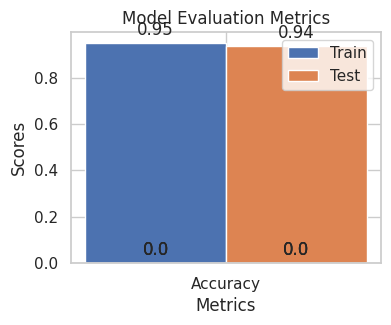

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Labels untuk setiap metrik
labels = ['Accuracy']

# Data untuk train dan test
train_scores = [accuracy_train, precision_train, recall_train, f1_score_train]
test_scores = [accuracy_test, precision_test, recall_test, f1_score_test]

# Indeks untuk setiap label
x = np.arange(len(labels))

# Lebar batang
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Annotasi label pada setiap batang
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Menambahkan label, judul, dan legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan label pada setiap batang
autolabel(rects1)
autolabel(rects2)

plt.show()
